In [7]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt
h.load_file('stdrun.hoc')

# build soma
soma = h.Section(name='soma')
soma.L = soma.diam = 20  # µm
soma.Ra = 100            # ohm·cm
soma.cm = 1              # µF/cm2

# passive + Hodgkin-Huxley channels
soma.insert('pas')
soma.e_pas = -65
soma.g_pas = 1e-4
soma.insert('hh')

# current clamp
stim = h.IClamp(soma(0.5))
stim.delay = 5.0   # ms
stim.dur   = 1.0   # ms
stim.amp   = 0.6   # nA  (increase if no spike — adjust to find rheobase)

# recordings
tvec = h.Vector().record(h._ref_t)
vvec = h.Vector().record(soma(0.5)._ref_v)

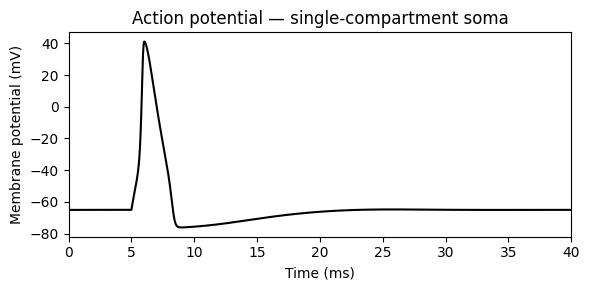

In [8]:
# run
h.finitialize(-65)
h.continuerun(40.0)

t = np.array(tvec)
v = np.array(vvec)

# single plot: membrane potential
plt.figure(figsize=(6,3))
plt.plot(t, v, color='k', lw=1.5)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Action potential — single-compartment soma')
plt.xlim(t.min(), t.max())
plt.tight_layout()
plt.show()